In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\KANISHKA\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv',
                index_col=0)

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


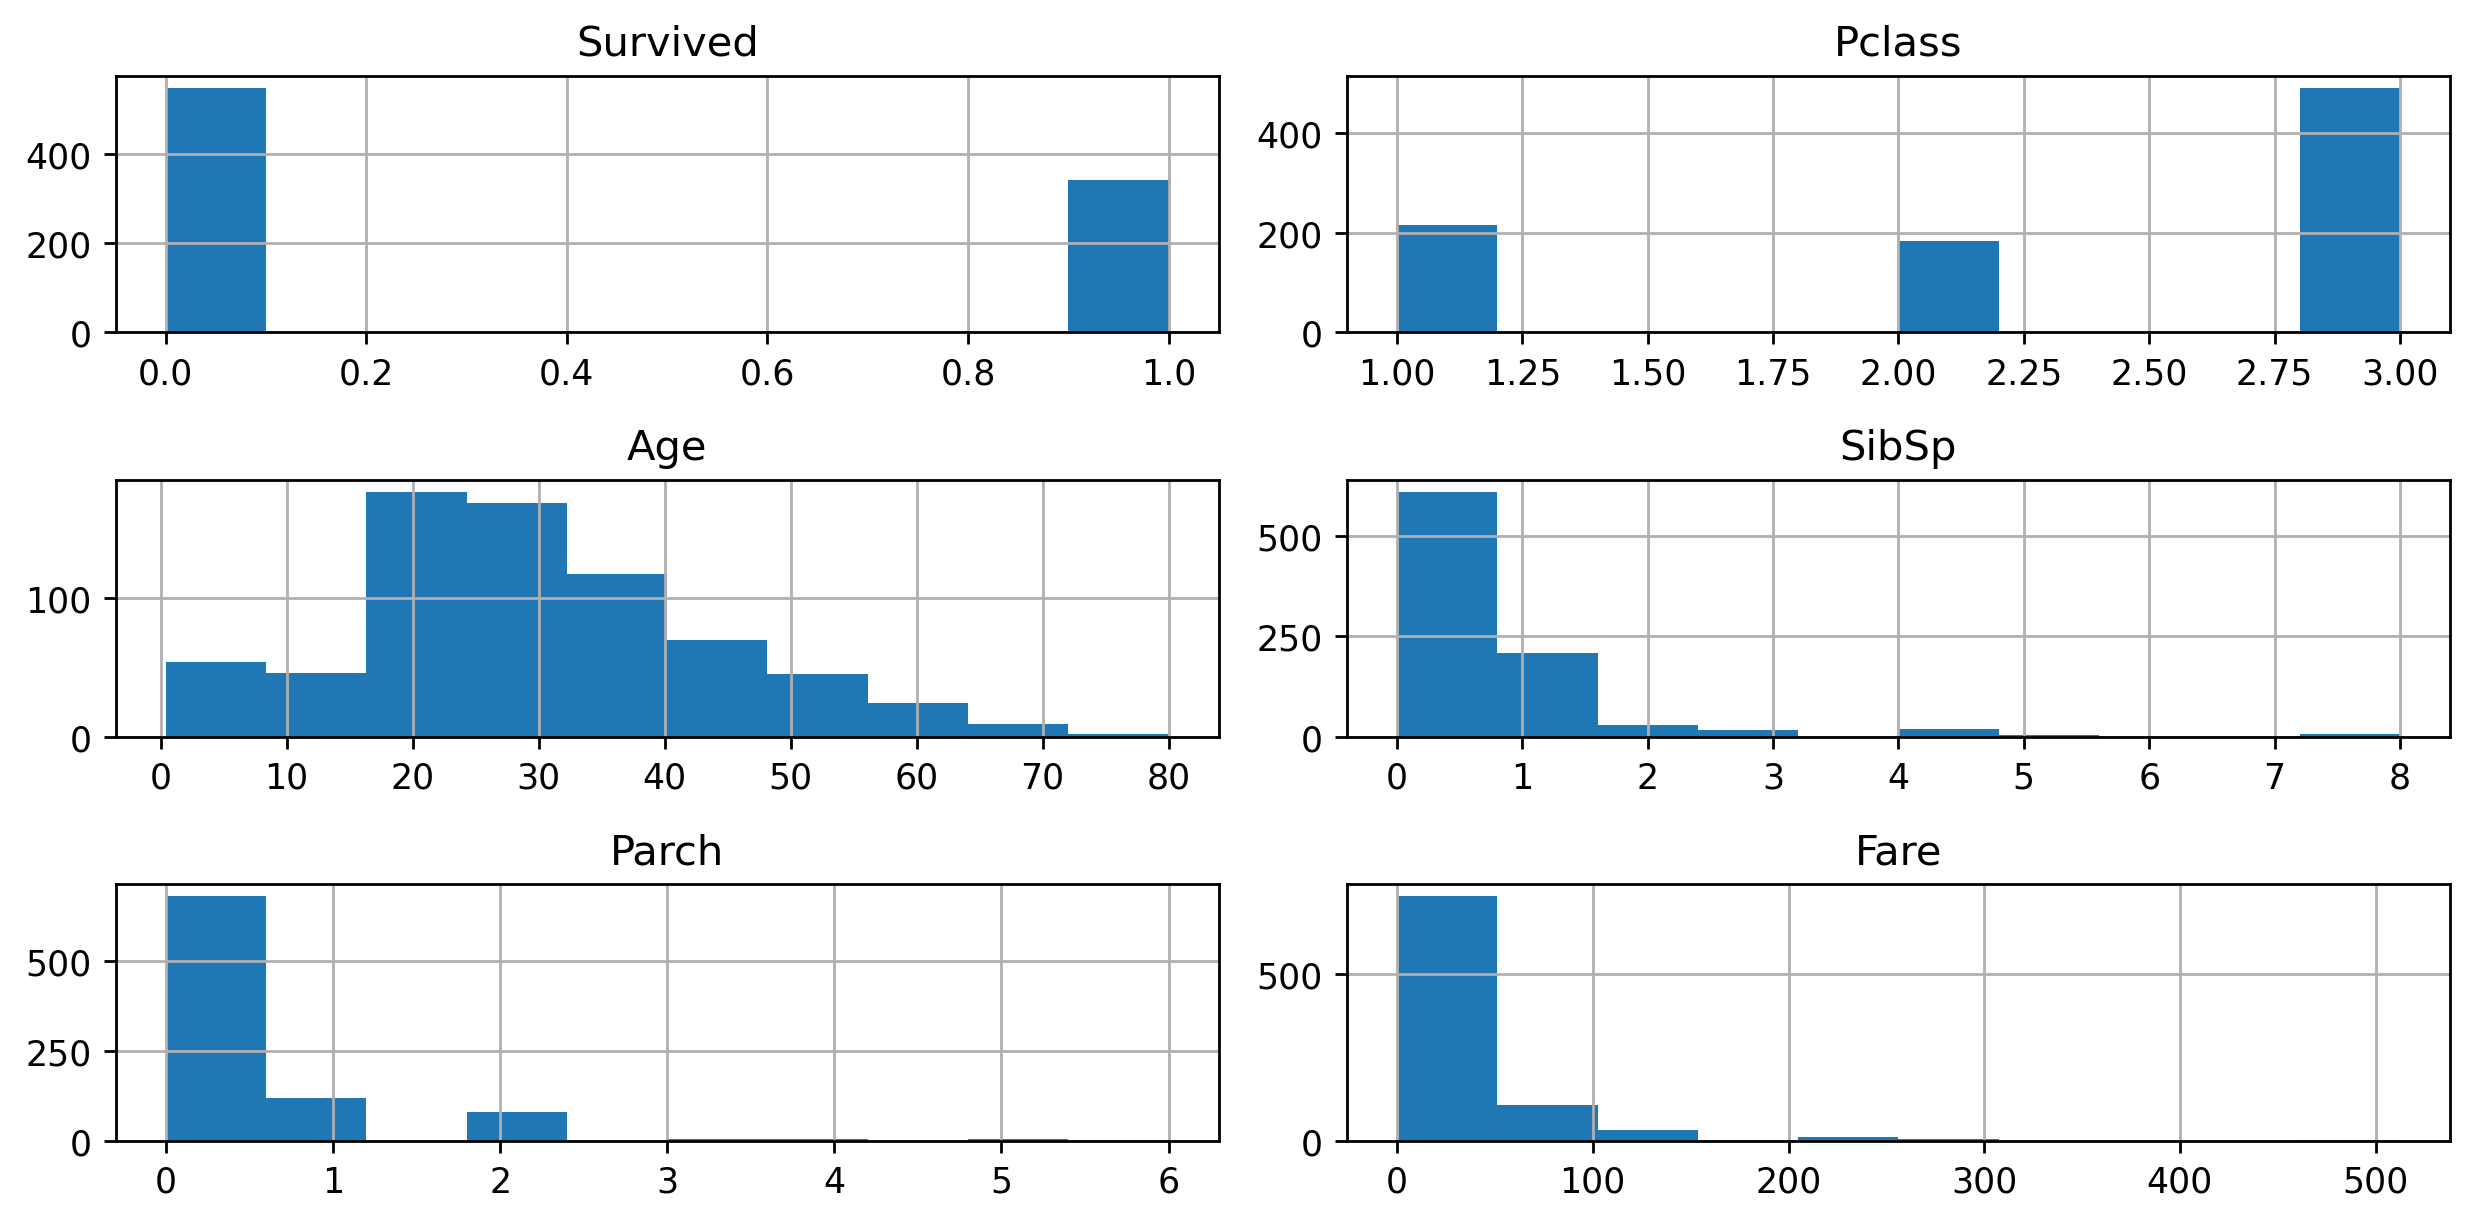

In [7]:
df.hist()
plt.tight_layout()

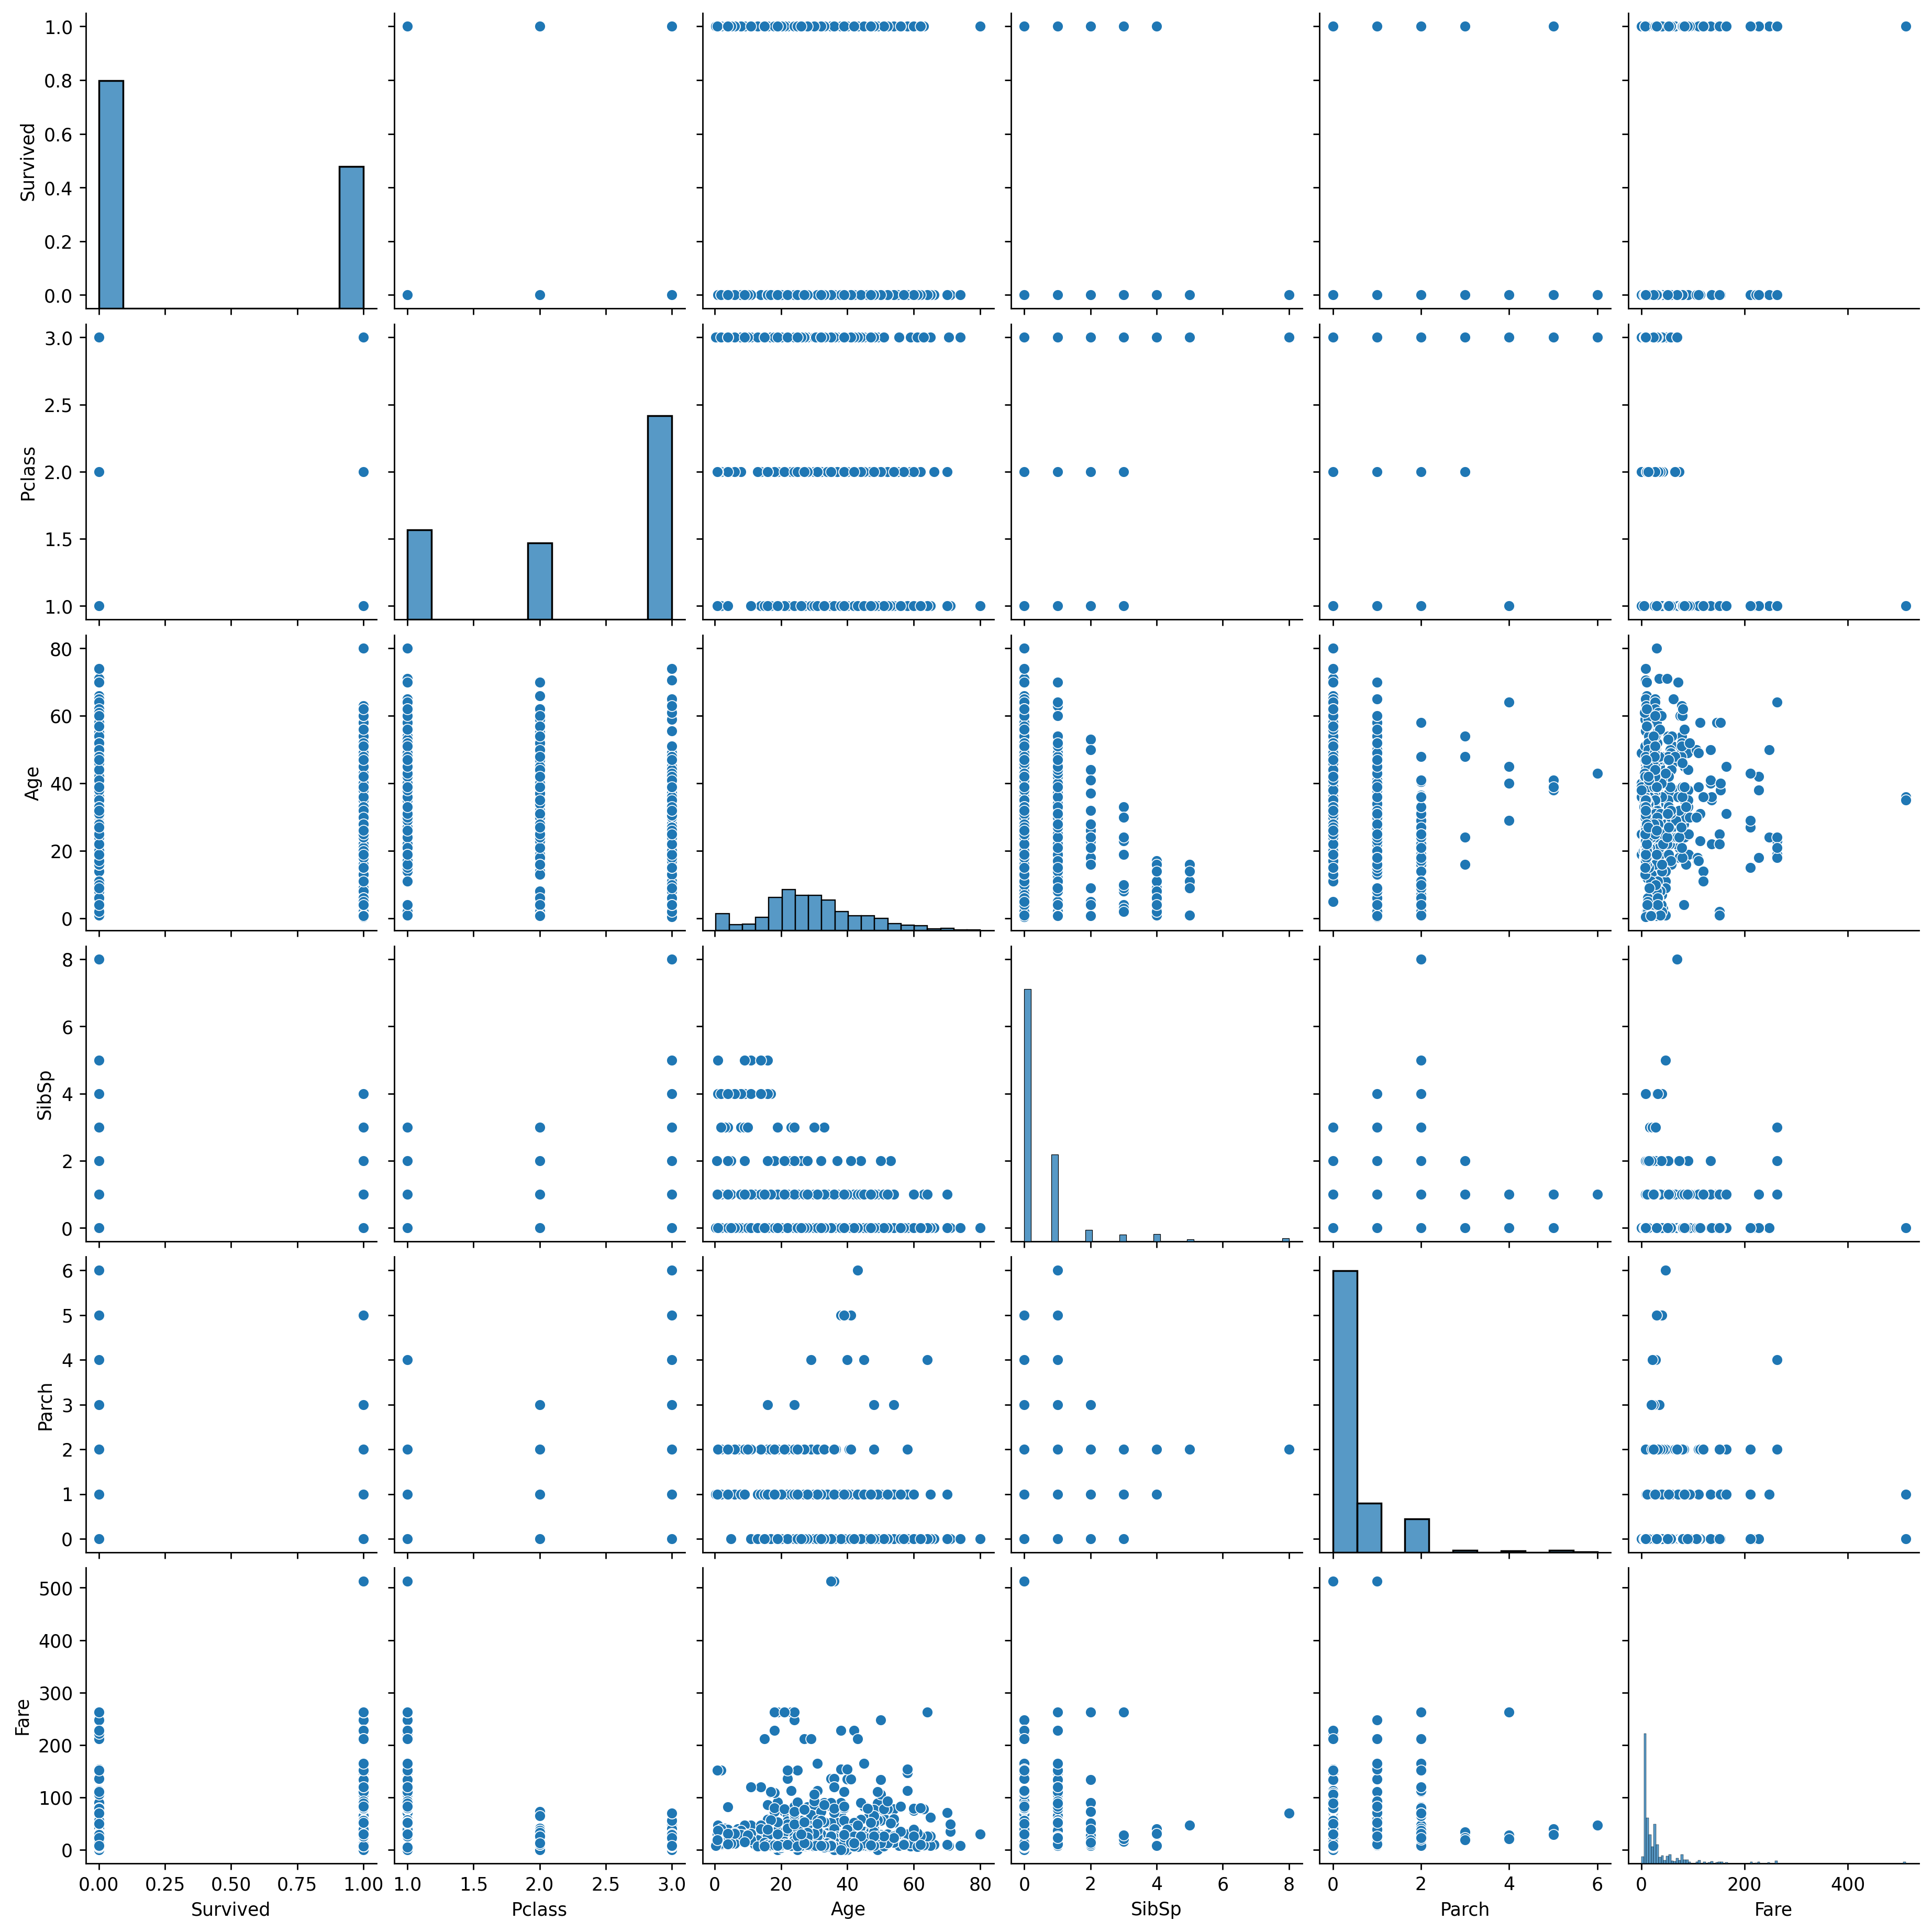

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
## there is no significant correlation can be seen among the independent variables

In [11]:
## check missing values

In [12]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
## handling missing values

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
si = SimpleImputer(strategy='most_frequent')

In [16]:
df['Embarked'] = si.fit_transform(df[['Embarked']])

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [18]:
## since there are too many missing values in the cabin column we will simply drop it along with the name and ticket column

In [19]:
df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [20]:
## encoding categorical variables

In [21]:
 df = pd.get_dummies(df, columns=['Sex','Embarked'])

In [22]:
## model building

In [23]:
## define x and y

In [24]:
x = df.iloc[:,1:]
y = df['Survived']

In [52]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [29]:
lg.coef_

array([[-0.88864521, -0.02829401, -0.28663487, -0.10863831,  0.00281429,
         2.0317442 , -0.59150867,  0.72434939,  0.48134236,  0.23454378]])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[90, 15],
       [20, 54]], dtype=int64)

<Axes: >

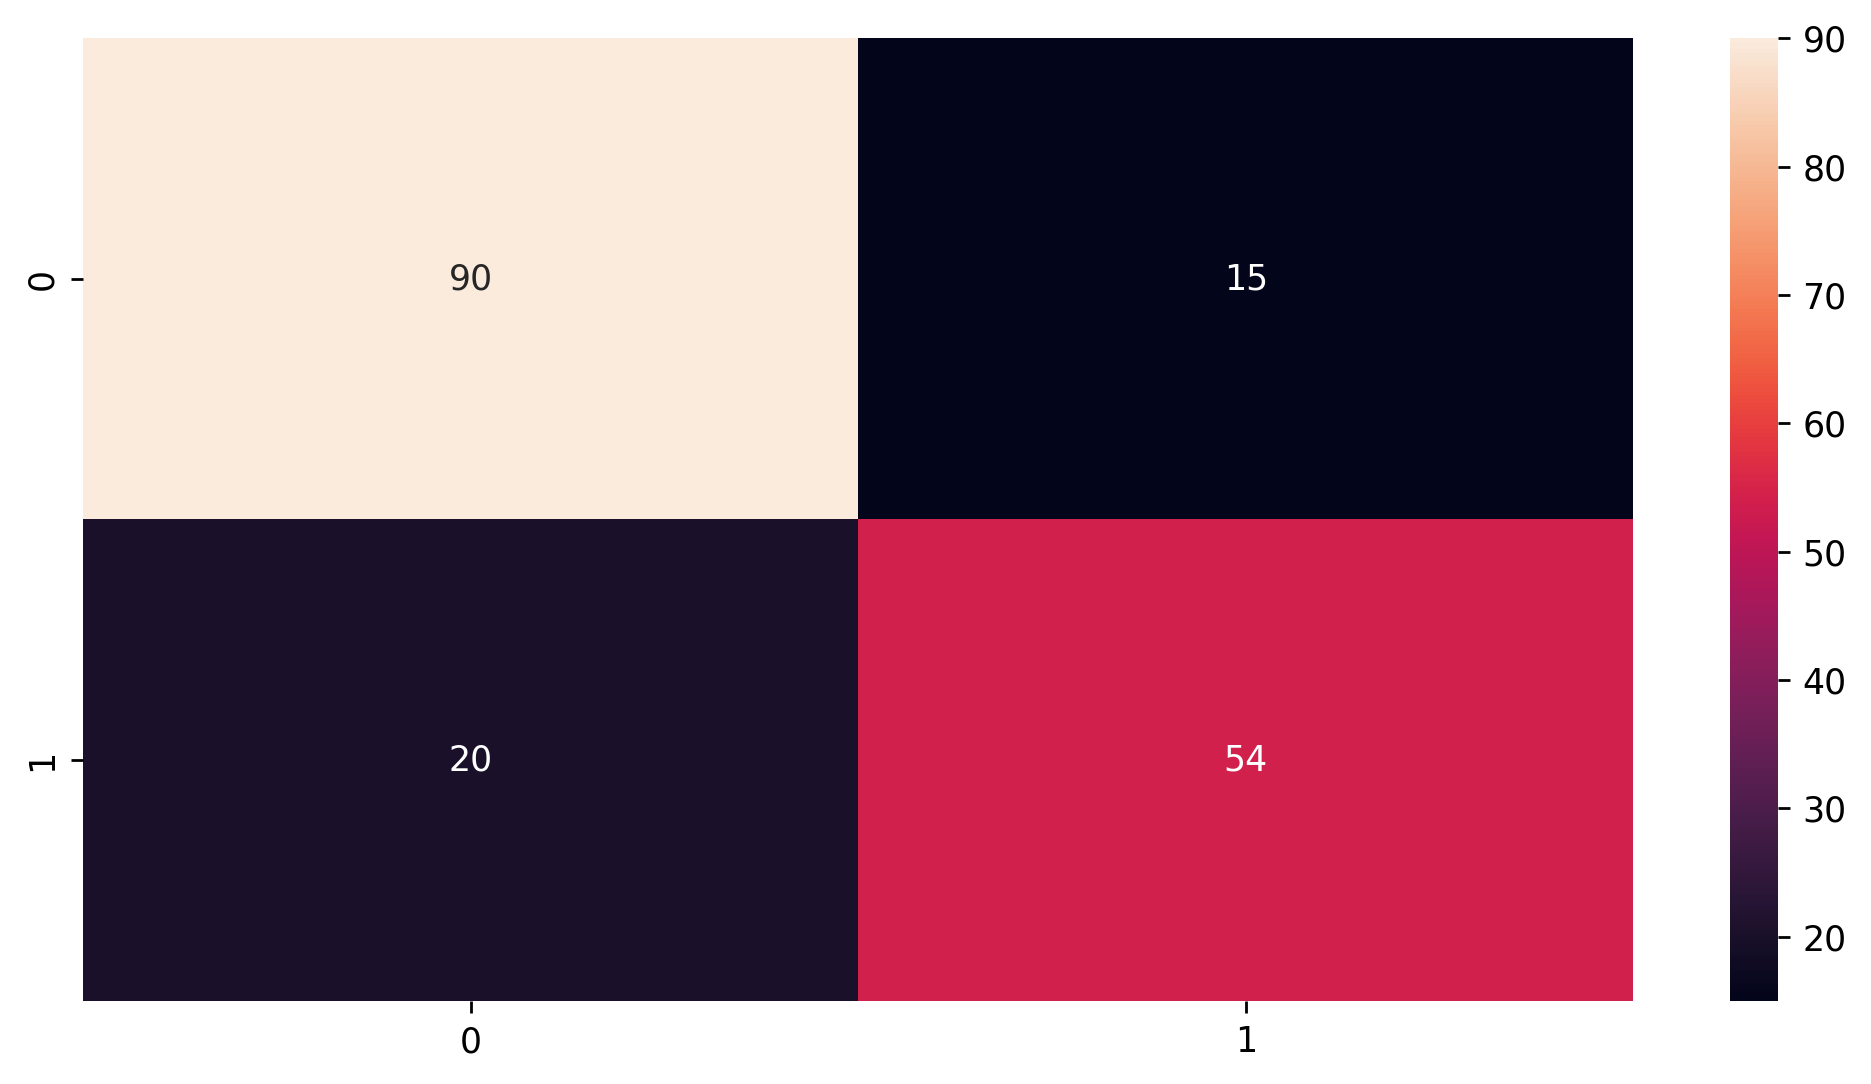

In [32]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt = 'g')

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
fpr, tpr, thresholds = roc_curve(ytest, ypred)

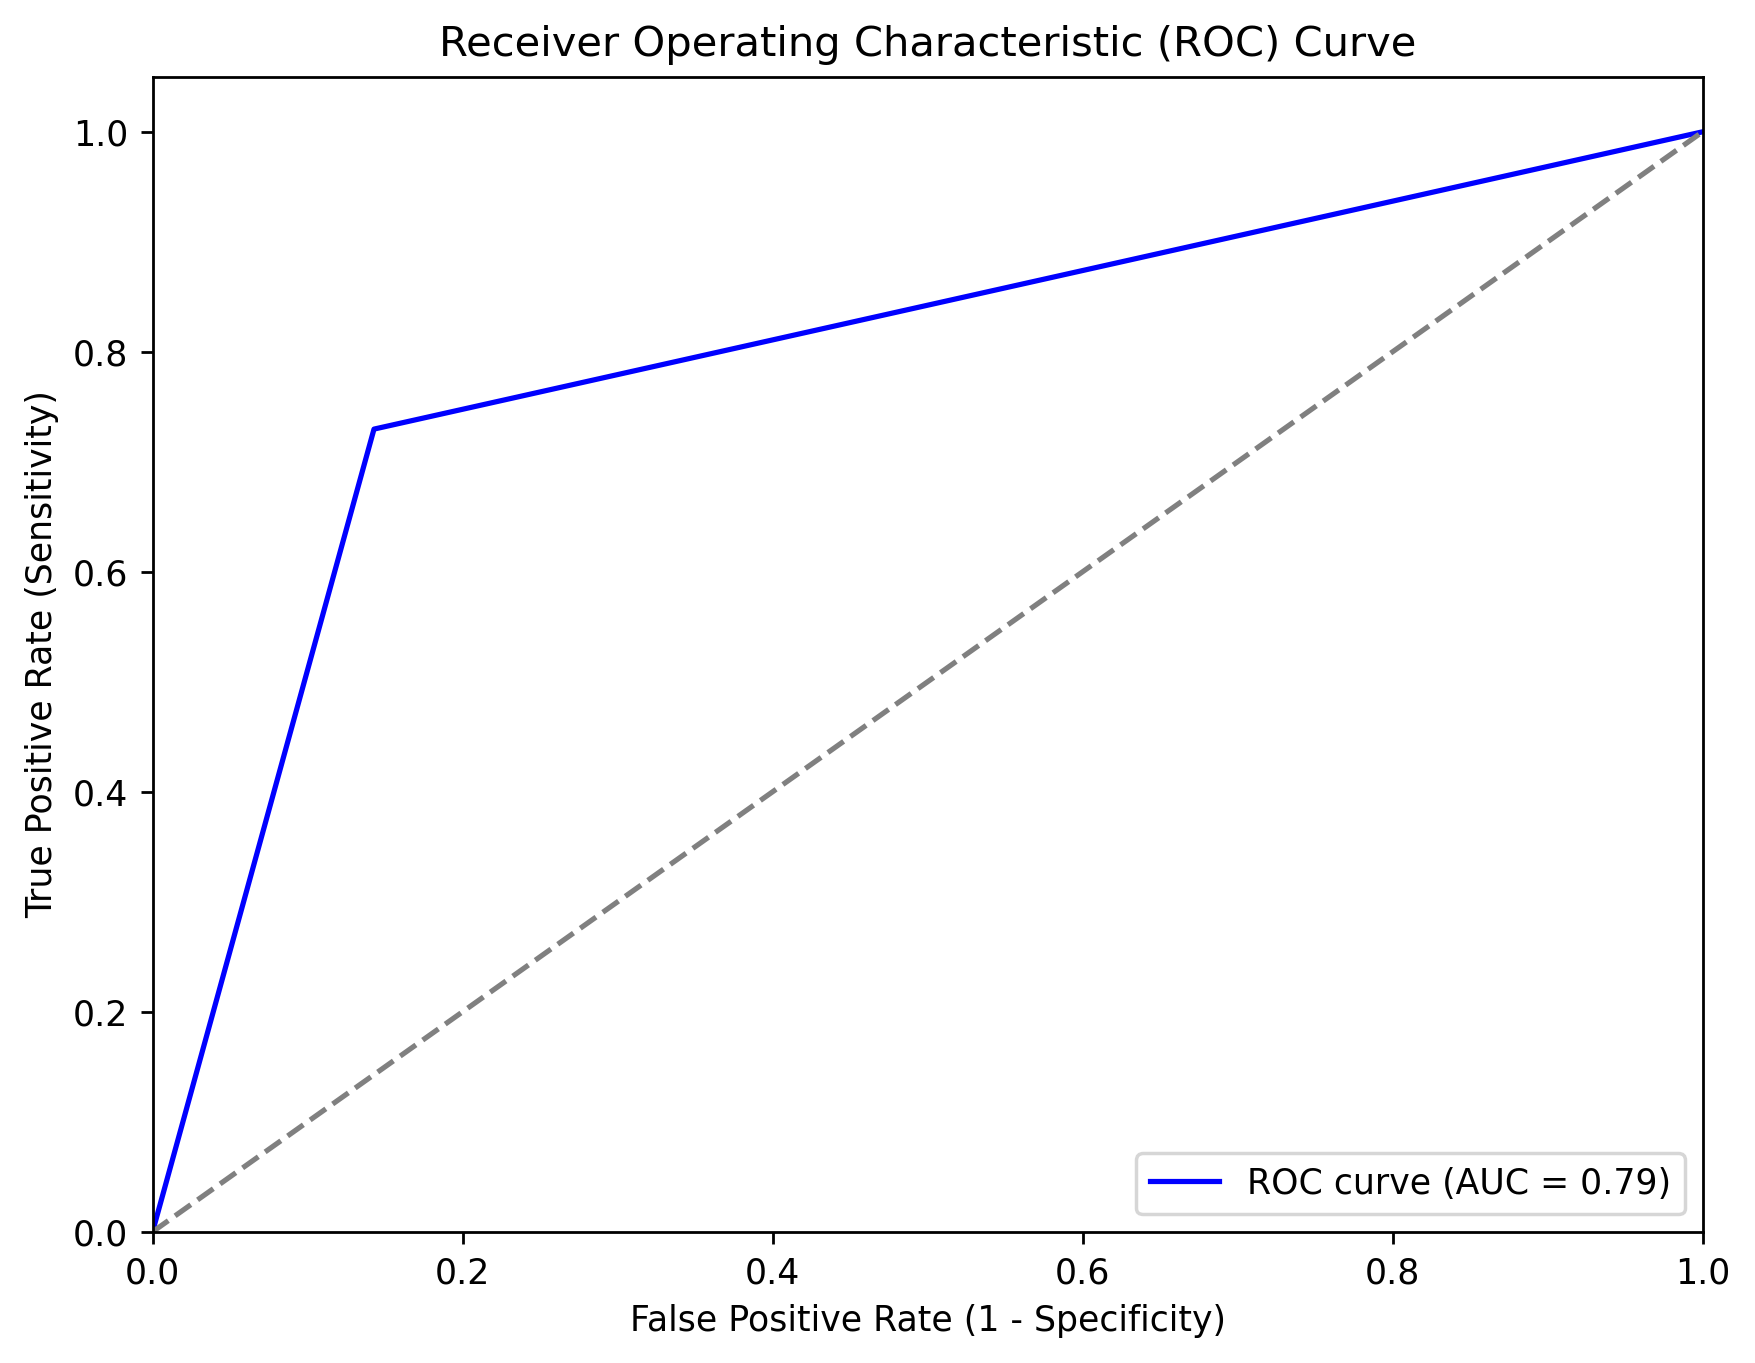

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(ytest, ypred)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [36]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [37]:
## intrepreting coefficients

In [38]:
pd.DataFrame(lg.coef_, columns= x.columns)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.888645,-0.028294,-0.286635,-0.108638,0.002814,2.031744,-0.591509,0.724349,0.481342,0.234544


In [39]:
## intreprtation of coefficients

# the age coefficient is negative which indicates that as age increses the log of positive outcome falls which means
## individuals of higher age have less chances of survival
## Females have higher chances of survival than the men, the reason could be that females will be given pririority by the
## rescuers
## embarked have three possible values namely, southampton, cherbourg and queenstown
## passengers embarked from Cherbourg have the highest chances of survival of 72% 
## passengers embarked from queenstown have moderate chances of survival of 48%
## passengers emabrked from Southampton have lowest chances of survival of 23%
## passaengers with parents and children have very chances of survival. The reason could be that they had given pririority
## to their family members first
## Passengers with sibling also had very less chances of survival

In [40]:
## significance of features

In [41]:
## the most important feature in predicting the target value is where the passengers have embarked their journey from
## and the age of passengers too can be seen as the most important features.

In [42]:
## saving the model

In [43]:
import joblib

In [44]:
joblib.dump(lg, 'logistic_model.pkl')

['logistic_model.pkl']

In [45]:
## create the streamlit app

In [47]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/7c/2e/60e624bbe16f4baa45cb6e48a1ee05edd48a0a14cceec4d7eec9258755ac/streamlit-1.38.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc4

In [48]:
import streamlit as st

In [49]:
model = joblib.load('logistic_model.pkl')

In [51]:
st.title("Titanic Survival Prediction")
st.write("Enter the passenger details to predict if they survived.")


2024-09-16 02:06:23.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:06:23.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:06:23.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:06:23.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:06:23.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:06:23.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [66]:
# Function to take user input
def user_input_features():
    Pclass = st.selectbox("Passenger Class (Pclass)", [1, 2, 3], help="1 = 1st class, 2 = 2nd class, 3 = 3rd class")
    Sex = st.selectbox("Sex", ["Male", "Female"])
    Age = st.slider("Age", 0, 80, 29)  # Default value of 29 (mean age)
    SibSp = st.number_input("Number of Siblings/Spouses Aboard (SibSp)", min_value=0, max_value=8, value=0)
    Parch = st.number_input("Number of Parents/Children Aboard (Parch)", min_value=0, max_value=6, value=0)
    Fare = st.slider("Passenger Fare", 0.0, 500.0, 32.2)  # Default mean fare
    Embarked = st.selectbox("Port of Embarkation (Embarked)",
                            ["Southampton", "Cherbourg", "Queenstown"], help="S = Southampton, C = Cherbourg, Q = Queenstown")
    
 # Convert 'Embarked' to numeric (S = 1, C = 2, Q = 0)
    if Embarked == "Southampton":
        embarked_numeric = 1
    elif Embarked == "Cherbourg":
        embarked_numeric = 2
    else:
        Embarked_numeric = 0
        
         
    # Convert 'Sex' to numeric (Male = 1, Female = 0)
    sex_numeric = 1 if Sex == "Male" else 0
    
    
     # Convert inputs into a DataFrame
    data = {'Pclass': Pclass,
            'Sex': sex_numeric,
            'Age': Age,
            'SibSp': SibSp,
            'Parch': Parch,
            'Fare': Fare,
            'Embarked': embarked_numeric}
    
       # Convert dictionary to DataFrame
    features = pd.DataFrame(data, index=[0])
    return features

In [68]:
# Get user input
input_df = user_input_features()

# Display the user input
st.subheader("Passenger Details")
st.write(input_df)

# One-hot encode the input to match the format used during training
# Perform one-hot encoding
input_df_encoded = pd.get_dummies(input_df, columns=['Sex', 'Embarked'], drop_first=False)

# Ensure all necessary columns are present (in case some categories were not selected)
required_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                    'Sex_female', 'Sex_male', 
                    'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Add missing columns and fill with 0
for col in required_columns:
    if col not in input_df_encoded.columns:
        input_df_encoded[col] = 0

# Reorder the columns to match the model training order
input_df_encoded = input_df_encoded[required_columns]

# Perform prediction
prediction = model.predict(input_df_encoded)
prediction_proba = model.predict_proba(input_df_encoded)

# Display the prediction result
st.subheader("Prediction")
survived = 'Yes' if prediction[0] == 1 else 'No'
st.write(f"Did the passenger survive? **{survived}**")

# Display prediction probability
st.subheader("Prediction Probability")
st.write(f"Survival Probability: {prediction_proba[0][1]:.2f}")
st.write(f"Non-Survival Probability: {prediction_proba[0][0]:.2f}")


2024-09-16 02:29:58.120 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-16 02:29:58.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar